# Bird Migration

### Objective:
--------------

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# for tsa

import os
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import mysql.connector

## Data Loading:

#### Trial data:

In [3]:
# df_raw_occ = pd.read_csv("/home/ayush/Desktop/DATASET/0031102-231002084531237/occurrence.txt", delimiter="\t", nrows=1500)

In [4]:
df_raw_occ = df_raw_occ = pd.read_csv("/home/sunbeam/Desktop/DATASET/0031102-231002084531237/occurrence.txt", delimiter="\t")

/tmp/ipykernel_19756/4081550103.py:1: DtypeWarning: Columns (82,199) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw_occ = df_raw_occ = pd.read_csv("/home/sunbeam/Desktop/DATASET/0031102-231002084531237/occurrence.txt", delimiter="\t")


In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Columns: 212 entries, gbifID to eventType
dtypes: bool(2), float64(146), int64(19), object(45)
memory usage: 1.4+ GB


---------------------
#### Deleting columns having only one single unique value and null values
------------------------

In [7]:
for col in df_raw_occ.columns:
    if df_raw_occ[col].nunique() == 1:
        del df_raw_occ[col]
        # removing columns that don't help in model buildiing
        print(col)
        

license
publisher
rightsHolder
type
datasetID
datasetName
basisOfRecord
individualCount
organismQuantity
organismQuantityType
occurrenceStatus
locality
kingdom
phylum
class
taxonRank
taxonomicStatus
datasetKey
publishingCountry
kingdomKey
phylumKey
classKey
protocol
lastCrawled


In [8]:
row_size,column_size = df_raw_occ.shape

In [9]:
# For null values:

for col in df_raw_occ.columns:
    if df_raw_occ[col].isna().sum() > 0.7*row_size:
        print(col,":", df_raw_occ[col].isna().sum())
        del df_raw_occ[col]


accessRights : 885595
bibliographicCitation : 885595
language : 885595
modified : 885595
references : 885595
institutionID : 885595
collectionID : 885595
institutionCode : 885595
collectionCode : 885595
ownerInstitutionCode : 885595
informationWithheld : 885595
dataGeneralizations : 885595
dynamicProperties : 885595
catalogNumber : 885595
recordNumber : 885595
recordedBy : 885595
recordedByID : 885595
sex : 885595
lifeStage : 885595
reproductiveCondition : 885595
behavior : 885595
establishmentMeans : 885595
degreeOfEstablishment : 885595
pathway : 885595
georeferenceVerificationStatus : 885595
preparations : 885595
disposition : 885595
associatedOccurrences : 885595
associatedReferences : 885595
associatedSequences : 885595
associatedTaxa : 885595
otherCatalogNumbers : 885595
occurrenceRemarks : 885595
organismName : 885595
organismScope : 885595
associatedOrganisms : 885595
previousIdentifications : 885595
organismRemarks : 885595
materialSampleID : 885595
parentEventID : 885595
fiel

 -------------------
 Checking new data
-----------------------

In [10]:
df_raw_occ.head()

,gbifID,occurrenceID,organismID,eventID,eventDate,year,month,day,continent,countryCode,decimalLatitude,decimalLongitude,identificationID,taxonID,acceptedNameUsageID,scientificName,order,family,genus,genericName,specificEpithet,lastInterpreted,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,orderKey,familyKey,genusKey,speciesKey,species,acceptedScientificName,verbatimScientificName,lastParsed,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,2028713273,3123967,2.Maria,https://plutof.ut.ee/#/event/view/3537494,2007-08-07T06:00:00,2007,8,7,EUROPE,BY,52.30767,27.30983,4986308,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:35.641Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:35.641Z,True,BLR,Belarus,BLR.1_1,Brest,BLR.1.10_1,Luninets,NaN,NaN,LC
1,2028931999,3338562,111.Ahja5,https://plutof.ut.ee/#/event/view/3752159,2017-06-19T10:24:00,2017,6,19,EUROPE,UA,46.14460,34.26638,5201575,62543,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,2023-10-17T20:04:02.378Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2474950,2474950,1493,9313,2474940,2474950,Grus grus,"Grus grus (Linnaeus, 1758)","Grus grus (Linnaeus, 1758)",2023-10-17T20:04:02.378Z,True,UKR,Ukraine,UKR.9_1,Kherson,UKR.9.12_1,Novotro‹ts'kyi,NaN,NaN,LC
2,2028715905,3123985,2.Maria,https://plutof.ut.ee/#/event/view/3537512,2007-08-22T12:00:00,2007,8,22,EUROPE,RO,46.29900,26.57217,4986326,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:37.986Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:37.986Z,True,ROU,Romania,ROU.4_1,Bacău,ROU.4.80_1,Targu Ocna,NaN,NaN,LC
3,2028936907,3338580,111.Ahja5,https://plutof.ut.ee/#/event/view/3752177,2017-06-19T16:24:00,2017,6,19,EUROPE,UA,46.14753,34.23717,5201593,62543,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,2023-10-17T20:04:02.379Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2474950,2474950,1493,9313,2474940,2474950,Grus grus,"Grus grus (Linnaeus, 1758)","Grus grus (Linnaeus, 1758)",2023-10-17T20:04:02.379Z,True,UKR,Ukraine,UKR.9_1,Kherson,UKR.9.12_1,Novotro‹ts'kyi,NaN,NaN,LC
4,2028715906,3124010,2.Maria,https://plutof.ut.ee/#/event/view/3537537,2007-08-26T06:00:00,2007,8,26,AFRICA,LY,29.49767,24.46550,4986351,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:38.023Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:38.023Z,True,LBY,Libya,LBY.1_1,Al Butnan,NaN,NaN,NaN,NaN,LC


In [11]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gbifID                  885595 non-null  int64  
 1   occurrenceID            885595 non-null  int64  
 2   organismID              885595 non-null  object 
 3   eventID                 885595 non-null  object 
 4   eventDate               885595 non-null  object 
 5   year                    885595 non-null  int64  
 6   month                   885595 non-null  int64  
 7   day                     885595 non-null  int64  
 8   continent               849534 non-null  object 
 9   countryCode             849714 non-null  object 
 10  decimalLatitude         843385 non-null  float64
 11  decimalLongitude        843385 non-null  float64
 12  identificationID        885595 non-null  int64  
 13  taxonID                 885595 non-null  int64  
 14  acceptedNameUsageID 

In [12]:
T_value = 0
F_value = 0
for i in range(row_size):
    if df_raw_occ["repatriated"][i]:
        T_value +=1
    elif df_raw_occ["repatriated"][i] == False:
        F_value+=1
    else:
        pass
        
        

print(T_value,F_value)

print(f"True value % = {(T_value)/(T_value+F_value)*100:0.2f}")

802047 83548
True value % = 90.57


In [13]:
df_raw_occ.head()

,gbifID,occurrenceID,organismID,eventID,eventDate,year,month,day,continent,countryCode,decimalLatitude,decimalLongitude,identificationID,taxonID,acceptedNameUsageID,scientificName,order,family,genus,genericName,specificEpithet,lastInterpreted,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,orderKey,familyKey,genusKey,speciesKey,species,acceptedScientificName,verbatimScientificName,lastParsed,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,2028713273,3123967,2.Maria,https://plutof.ut.ee/#/event/view/3537494,2007-08-07T06:00:00,2007,8,7,EUROPE,BY,52.30767,27.30983,4986308,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:35.641Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:35.641Z,True,BLR,Belarus,BLR.1_1,Brest,BLR.1.10_1,Luninets,NaN,NaN,LC
1,2028931999,3338562,111.Ahja5,https://plutof.ut.ee/#/event/view/3752159,2017-06-19T10:24:00,2017,6,19,EUROPE,UA,46.14460,34.26638,5201575,62543,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,2023-10-17T20:04:02.378Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2474950,2474950,1493,9313,2474940,2474950,Grus grus,"Grus grus (Linnaeus, 1758)","Grus grus (Linnaeus, 1758)",2023-10-17T20:04:02.378Z,True,UKR,Ukraine,UKR.9_1,Kherson,UKR.9.12_1,Novotro‹ts'kyi,NaN,NaN,LC
2,2028715905,3123985,2.Maria,https://plutof.ut.ee/#/event/view/3537512,2007-08-22T12:00:00,2007,8,22,EUROPE,RO,46.29900,26.57217,4986326,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:37.986Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:37.986Z,True,ROU,Romania,ROU.4_1,Bacău,ROU.4.80_1,Targu Ocna,NaN,NaN,LC
3,2028936907,3338580,111.Ahja5,https://plutof.ut.ee/#/event/view/3752177,2017-06-19T16:24:00,2017,6,19,EUROPE,UA,46.14753,34.23717,5201593,62543,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,2023-10-17T20:04:02.379Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2474950,2474950,1493,9313,2474940,2474950,Grus grus,"Grus grus (Linnaeus, 1758)","Grus grus (Linnaeus, 1758)",2023-10-17T20:04:02.379Z,True,UKR,Ukraine,UKR.9_1,Kherson,UKR.9.12_1,Novotro‹ts'kyi,NaN,NaN,LC
4,2028715906,3124010,2.Maria,https://plutof.ut.ee/#/event/view/3537537,2007-08-26T06:00:00,2007,8,26,AFRICA,LY,29.49767,24.46550,4986351,85366,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,2023-10-17T20:02:38.023Z,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,True,False,2480726,2480726,7191147,4408414,2480725,2480726,Pandion haliaetus,"Pandion haliaetus (Linnaeus, 1758)","Pandion haliaetus (Linnaeus, 1758)",2023-10-17T20:02:38.023Z,True,LBY,Libya,LBY.1_1,Al Butnan,NaN,NaN,NaN,NaN,LC


In [14]:
df_raw_occ.drop(["gbifID","occurrenceID","organismID","eventID","countryCode","lastParsed","level0Gid"], inplace = True,axis = 1)

In [15]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   eventDate               885595 non-null  object 
 1   year                    885595 non-null  int64  
 2   month                   885595 non-null  int64  
 3   day                     885595 non-null  int64  
 4   continent               849534 non-null  object 
 5   decimalLatitude         843385 non-null  float64
 6   decimalLongitude        843385 non-null  float64
 7   identificationID        885595 non-null  int64  
 8   taxonID                 885595 non-null  int64  
 9   acceptedNameUsageID     885595 non-null  int64  
 10  scientificName          885595 non-null  object 
 11  order                   885595 non-null  object 
 12  family                  885595 non-null  object 
 13  genus                   885595 non-null  object 
 14  genericName         

In [16]:
list_toDrop  = ["acceptedScientificName","issue","lastInterpreted","level3Gid","level2Gid","level1Gid","hasGeospatialIssues","taxonKey","acceptedTaxonKey","orderKey","familyKey","genusKey","speciesKey","species"]

In [17]:
df_raw_occ.drop(list_toDrop,inplace=True,axis = 1)

In [18]:
df_raw_occ.info()
list_toDrop = ["taxonID"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   eventDate               885595 non-null  object 
 1   year                    885595 non-null  int64  
 2   month                   885595 non-null  int64  
 3   day                     885595 non-null  int64  
 4   continent               849534 non-null  object 
 5   decimalLatitude         843385 non-null  float64
 6   decimalLongitude        843385 non-null  float64
 7   identificationID        885595 non-null  int64  
 8   taxonID                 885595 non-null  int64  
 9   acceptedNameUsageID     885595 non-null  int64  
 10  scientificName          885595 non-null  object 
 11  order                   885595 non-null  object 
 12  family                  885595 non-null  object 
 13  genus                   885595 non-null  object 
 14  genericName         

In [19]:
df_raw_occ.drop(list_toDrop,inplace=True,axis = 1)

In [20]:
df_raw_occ.head(7)

,eventDate,year,month,day,continent,decimalLatitude,decimalLongitude,identificationID,acceptedNameUsageID,scientificName,order,family,genus,genericName,specificEpithet,hasCoordinate,verbatimScientificName,repatriated,level0Name,level1Name,level2Name,level3Name,iucnRedListCategory
0,2007-08-07T06:00:00,2007,8,7,EUROPE,52.30767,27.30983,4986308,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,True,"Pandion haliaetus (Linnaeus, 1758)",True,Belarus,Brest,Luninets,NaN,LC
1,2017-06-19T10:24:00,2017,6,19,EUROPE,46.14460,34.26638,5201575,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,True,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,NaN,LC
2,2007-08-22T12:00:00,2007,8,22,EUROPE,46.29900,26.57217,4986326,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,True,"Pandion haliaetus (Linnaeus, 1758)",True,Romania,Bacău,Targu Ocna,NaN,LC
3,2017-06-19T16:24:00,2017,6,19,EUROPE,46.14753,34.23717,5201593,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,True,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,NaN,LC
4,2007-08-26T06:00:00,2007,8,26,AFRICA,29.49767,24.46550,4986351,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,True,"Pandion haliaetus (Linnaeus, 1758)",True,Libya,Al Butnan,NaN,NaN,LC
5,2017-06-19T22:44:00,2017,6,19,EUROPE,46.14125,34.24380,5201613,2474950,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,Grus,grus,True,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,NaN,LC
6,2007-08-28T16:00:00,2007,8,28,AFRICA,18.88700,22.85383,4986370,2480726,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,Pandion,haliaetus,True,"Pandion haliaetus (Linnaeus, 1758)",True,Chad,Ennedi Est,Ennedi Est,Ennedi Est,LC


In [21]:
list_toDrop = ["identificationID","identificationID","genericName"]

In [22]:
df_raw_occ.drop(list_toDrop,axis=1,inplace=True)

In [23]:
df_raw_occ.drop("hasCoordinate",axis = 1,inplace=True)

In [24]:
list_toDrop = ["acceptedNameUsageID","level3Name"]

In [25]:
df_raw_occ.drop(list_toDrop,axis=1,inplace=True)

In [26]:
df_raw_occ.head()

,eventDate,year,month,day,continent,decimalLatitude,decimalLongitude,scientificName,order,family,genus,specificEpithet,verbatimScientificName,repatriated,level0Name,level1Name,level2Name,iucnRedListCategory
0,2007-08-07T06:00:00,2007,8,7,EUROPE,52.30767,27.30983,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Belarus,Brest,Luninets,LC
1,2017-06-19T10:24:00,2017,6,19,EUROPE,46.14460,34.26638,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,LC
2,2007-08-22T12:00:00,2007,8,22,EUROPE,46.29900,26.57217,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Romania,Bacău,Targu Ocna,LC
3,2017-06-19T16:24:00,2017,6,19,EUROPE,46.14753,34.23717,"Grus grus (Linnaeus, 1758)",Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,LC
4,2007-08-26T06:00:00,2007,8,26,AFRICA,29.49767,24.46550,"Pandion haliaetus (Linnaeus, 1758)",Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Libya,Al Butnan,NaN,LC


In [27]:
n = 0
for i in range(row_size):
    if df_raw_occ["verbatimScientificName"][i] != df_raw_occ["scientificName"][i]:
        n+=1

print(n)

79449


In [28]:
list_toDrop = ["scientificName"]

In [29]:
df_raw_occ.drop(list_toDrop,axis=1,inplace=True)

In [30]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   eventDate               885595 non-null  object 
 1   year                    885595 non-null  int64  
 2   month                   885595 non-null  int64  
 3   day                     885595 non-null  int64  
 4   continent               849534 non-null  object 
 5   decimalLatitude         843385 non-null  float64
 6   decimalLongitude        843385 non-null  float64
 7   order                   885595 non-null  object 
 8   family                  885595 non-null  object 
 9   genus                   885595 non-null  object 
 10  specificEpithet         885595 non-null  object 
 11  verbatimScientificName  885595 non-null  object 
 12  repatriated             851240 non-null  object 
 13  level0Name              833267 non-null  object 
 14  level1Name          

In [31]:
df_raw_occ.isna().sum()

eventDate                     0
year                          0
month                         0
day                           0
continent                 36061
decimalLatitude           42210
decimalLongitude          42210
order                         0
family                        0
genus                         0
specificEpithet               0
verbatimScientificName        0
repatriated               34355
level0Name                52328
level1Name                52328
level2Name                73542
iucnRedListCategory           0
dtype: int64

In [32]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   eventDate               885595 non-null  object 
 1   year                    885595 non-null  int64  
 2   month                   885595 non-null  int64  
 3   day                     885595 non-null  int64  
 4   continent               849534 non-null  object 
 5   decimalLatitude         843385 non-null  float64
 6   decimalLongitude        843385 non-null  float64
 7   order                   885595 non-null  object 
 8   family                  885595 non-null  object 
 9   genus                   885595 non-null  object 
 10  specificEpithet         885595 non-null  object 
 11  verbatimScientificName  885595 non-null  object 
 12  repatriated             851240 non-null  object 
 13  level0Name              833267 non-null  object 
 14  level1Name          

In [33]:
required_columns = df_raw_occ.columns

### SQL connection

In [34]:
# hostname="localhost"
# dbname="cdac_project"
# uname="root"
# pwd="manager"

In [35]:
# engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
# 				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [36]:
# df_raw_occ.to_sql('demo_data', engine, index=False)

In [37]:
x = round(df_raw_occ["decimalLatitude"][0],3)

In [38]:
df_raw_occ["trial_long"] = round(df_raw_occ["decimalLongitude"],3)+2

In [39]:
df_raw_occ[["decimalLongitude","trial_long"]]

,decimalLongitude,trial_long
0,27.30983,29.310
1,34.26638,36.266
2,26.57217,28.572
3,34.23717,36.237
4,24.46550,26.466
...,...,...
885590,34.24006,36.240
885591,34.21575,36.216
885592,34.23564,36.236
885593,34.24431,36.244


In [40]:
df_raw_occ.head()

,eventDate,year,month,day,continent,decimalLatitude,decimalLongitude,order,family,genus,specificEpithet,verbatimScientificName,repatriated,level0Name,level1Name,level2Name,iucnRedListCategory,trial_long
0,2007-08-07T06:00:00,2007,8,7,EUROPE,52.30767,27.30983,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Belarus,Brest,Luninets,LC,29.310
1,2017-06-19T10:24:00,2017,6,19,EUROPE,46.14460,34.26638,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,LC,36.266
2,2007-08-22T12:00:00,2007,8,22,EUROPE,46.29900,26.57217,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Romania,Bacău,Targu Ocna,LC,28.572
3,2017-06-19T16:24:00,2017,6,19,EUROPE,46.14753,34.23717,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,Novotro‹ts'kyi,LC,36.237
4,2007-08-26T06:00:00,2007,8,26,AFRICA,29.49767,24.46550,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Libya,Al Butnan,NaN,LC,26.466


In [41]:
list_toDrop = ["level2Name","iucnRedListCategory"]


In [42]:
df_raw_occ.drop(list_toDrop, axis=1, inplace=True)

In [43]:
df_raw_occ.head()

,eventDate,year,month,day,continent,decimalLatitude,decimalLongitude,order,family,genus,specificEpithet,verbatimScientificName,repatriated,level0Name,level1Name,trial_long
0,2007-08-07T06:00:00,2007,8,7,EUROPE,52.30767,27.30983,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Belarus,Brest,29.310
1,2017-06-19T10:24:00,2017,6,19,EUROPE,46.14460,34.26638,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,36.266
2,2007-08-22T12:00:00,2007,8,22,EUROPE,46.29900,26.57217,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Romania,Bacău,28.572
3,2017-06-19T16:24:00,2017,6,19,EUROPE,46.14753,34.23717,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",True,Ukraine,Kherson,36.237
4,2007-08-26T06:00:00,2007,8,26,AFRICA,29.49767,24.46550,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",True,Libya,Al Butnan,26.466


In [44]:
df_raw_occ["verbatimScientificName"].unique()

array(['Pandion haliaetus (Linnaeus, 1758)', 'Grus grus (Linnaeus, 1758)',
       'Ciconia nigra (Linnaeus, 1758)',
       'Haliaeetus albicilla (Linnaeus, 1758)',
       'Aquila clanga Pallas, 1811', 'Aquila pomarina C. L. Brehm, 1831',
       'Buteo buteo (Linnaeus, 1758)', 'Ciconia ciconia (Linnaeus, 1758)',
       'Botaurus stellaris (Linnaeus, 1758)',
       'Aegypius monachus (Linnaeus, 1766)'], dtype=object)

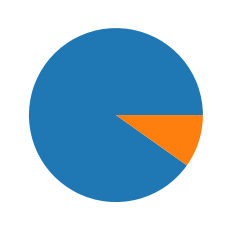

In [45]:
plt.pie(df_raw_occ["repatriated"].value_counts())
plt.show()

In [46]:
df_raw_occ.drop(["repatriated"], axis = 1, inplace=True)

## Removed lat and long, will use for plotting with GeoPandas and Tableau

In [47]:
list_toDrop = ["trial_long","decimalLatitude","decimalLongitude"]

In [48]:
df_raw_occ.drop(list_toDrop, axis = 1, inplace=True)

In [49]:
df_raw_occ.head()

,eventDate,year,month,day,continent,order,family,genus,specificEpithet,verbatimScientificName,level0Name,level1Name
0,2007-08-07T06:00:00,2007,8,7,EUROPE,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",Belarus,Brest
1,2017-06-19T10:24:00,2017,6,19,EUROPE,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",Ukraine,Kherson
2,2007-08-22T12:00:00,2007,8,22,EUROPE,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",Romania,Bacău
3,2017-06-19T16:24:00,2017,6,19,EUROPE,Gruiformes,Gruidae,Grus,grus,"Grus grus (Linnaeus, 1758)",Ukraine,Kherson
4,2007-08-26T06:00:00,2007,8,26,AFRICA,Accipitriformes,Pandionidae,Pandion,haliaetus,"Pandion haliaetus (Linnaeus, 1758)",Libya,Al Butnan


In [50]:
df_raw_occ["verbatimScientificName"].value_counts()

verbatimScientificName
Grus grus (Linnaeus, 1758)               358712
Aquila clanga Pallas, 1811               141656
Ciconia nigra (Linnaeus, 1758)           108179
Haliaeetus albicilla (Linnaeus, 1758)     98231
Aquila pomarina C. L. Brehm, 1831         79449
Pandion haliaetus (Linnaeus, 1758)        64146
Botaurus stellaris (Linnaeus, 1758)       23402
Buteo buteo (Linnaeus, 1758)               4909
Ciconia ciconia (Linnaeus, 1758)           4461
Aegypius monachus (Linnaeus, 1766)         2450
Name: count, dtype: int64

In [51]:
df_raw_occ["verbatimScientificName"] = df_raw_occ["verbatimScientificName"].str.split("(").str[0].str.strip()

In [52]:
df_raw_occ.head()

,eventDate,year,month,day,continent,order,family,genus,specificEpithet,verbatimScientificName,level0Name,level1Name
0,2007-08-07T06:00:00,2007,8,7,EUROPE,Accipitriformes,Pandionidae,Pandion,haliaetus,Pandion haliaetus,Belarus,Brest
1,2017-06-19T10:24:00,2017,6,19,EUROPE,Gruiformes,Gruidae,Grus,grus,Grus grus,Ukraine,Kherson
2,2007-08-22T12:00:00,2007,8,22,EUROPE,Accipitriformes,Pandionidae,Pandion,haliaetus,Pandion haliaetus,Romania,Bacău
3,2017-06-19T16:24:00,2017,6,19,EUROPE,Gruiformes,Gruidae,Grus,grus,Grus grus,Ukraine,Kherson
4,2007-08-26T06:00:00,2007,8,26,AFRICA,Accipitriformes,Pandionidae,Pandion,haliaetus,Pandion haliaetus,Libya,Al Butnan


In [53]:
list_toDrop = ["order"	,"family"	,"genus","specificEpithet"]

In [54]:
df_raw_occ.drop(list_toDrop, axis=1, inplace=True)

In [55]:
col_list = df_raw_occ.columns
print(col_list)

Index(['eventDate', 'year', 'month', 'day', 'continent',
       'verbatimScientificName', 'level0Name', 'level1Name'],
      dtype='object')


In [56]:
df_raw_occ.isna().sum()

eventDate                     0
year                          0
month                         0
day                           0
continent                 36061
verbatimScientificName        0
level0Name                52328
level1Name                52328
dtype: int64

# SQL take2


In [57]:
hostname="localhost"
dbname="cdac_project"
uname="root"
pwd="manager"

In [58]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [59]:
df_raw_occ.to_sql('demo_data_12_22_3', engine, index=False)


ValueError: Table 'demo_data' already exists.

In [60]:
mydb = mysql.connector.connect(
    host="localhost", username="root", password="manager", database="cdac_project"
)



In [61]:
def query(query):
    mycursor = mydb.cursor()
    sql = query
    mycursor.execute(sql)
    result = mycursor.fetchall()
    mycursor.close()

    return pd.DataFrame(result,columns=col_list)

In [62]:
q1 = query("SELECT * FROM demo_data_12_22_3 limit 5")

In [63]:
print(pd.DataFrame(q1))

             eventDate  year  month  day continent verbatimScientificName  \
0  2007-08-07T06:00:00  2007      8    7    EUROPE      Pandion haliaetus   
1  2017-06-19T10:24:00  2017      6   19    EUROPE              Grus grus   
2  2007-08-22T12:00:00  2007      8   22    EUROPE      Pandion haliaetus   
3  2017-06-19T16:24:00  2017      6   19    EUROPE              Grus grus   
4  2007-08-26T06:00:00  2007      8   26    AFRICA      Pandion haliaetus   

  level0Name level1Name  
0    Belarus      Brest  
1    Ukraine    Kherson  
2    Romania      Bacău  
3    Ukraine    Kherson  
4      Libya  Al Butnan  


In [64]:
q2 = query("SELECT * FROM demo_data_12_22_3 WHERE verbatimScientificName = 'Grus grus'")

In [65]:
q2.isna().sum()

eventDate                    0
year                         0
month                        0
day                          0
continent                  876
verbatimScientificName       0
level0Name                4389
level1Name                4389
dtype: int64

In [66]:
# df_raw_occ["verbatimScientificName"].unique()
# df['New_Column'] = df['Text'].str.split(' ', 2).str[-1]

df_raw_occ["Specie"] = df_raw_occ["verbatimScientificName"].str.split(' ').str[0] + " " + df_raw_occ["verbatimScientificName"].str.split(' ').str[1]   

In [67]:
list_toDrop = ["verbatimScientificName"]
df_raw_occ.drop(list_toDrop,axis=1,inplace=True)

In [68]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   eventDate   885595 non-null  object
 1   year        885595 non-null  int64 
 2   month       885595 non-null  int64 
 3   day         885595 non-null  int64 
 4   continent   849534 non-null  object
 5   level0Name  833267 non-null  object
 6   level1Name  833267 non-null  object
 7   Specie      885595 non-null  object
dtypes: int64(3), object(5)
memory usage: 54.1+ MB


In [69]:
list_toDrop = ["new_col"]

In [71]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885595 entries, 0 to 885594
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   eventDate   885595 non-null  object
 1   year        885595 non-null  int64 
 2   month       885595 non-null  int64 
 3   day         885595 non-null  int64 
 4   continent   849534 non-null  object
 5   level0Name  833267 non-null  object
 6   level1Name  833267 non-null  object
 7   Specie      885595 non-null  object
dtypes: int64(3), object(5)
memory usage: 54.1+ MB


In [74]:
df_raw_occ.rename(columns={"level0Name": "Country","level1Name":"City"}, inplace=True)

In [75]:
df_raw_occ

,eventDate,year,month,day,continent,Country,City,Specie
0,2007-08-07T06:00:00,2007,8,7,EUROPE,Belarus,Brest,Pandion haliaetus
1,2017-06-19T10:24:00,2017,6,19,EUROPE,Ukraine,Kherson,Grus grus
2,2007-08-22T12:00:00,2007,8,22,EUROPE,Romania,Bacău,Pandion haliaetus
3,2017-06-19T16:24:00,2017,6,19,EUROPE,Ukraine,Kherson,Grus grus
4,2007-08-26T06:00:00,2007,8,26,AFRICA,Libya,Al Butnan,Pandion haliaetus
...,...,...,...,...,...,...,...,...
885590,2017-06-18T02:25:00,2017,6,18,EUROPE,Ukraine,Kherson,Grus grus
885591,2017-06-18T08:24:00,2017,6,18,EUROPE,Ukraine,Kherson,Grus grus
885592,2017-06-18T17:24:00,2017,6,18,EUROPE,Ukraine,Kherson,Grus grus
885593,2017-06-18T23:25:00,2017,6,18,EUROPE,Ukraine,Kherson,Grus grus


In [76]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885595 entries, 0 to 885594
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   eventDate  885595 non-null  object
 1   year       885595 non-null  int64 
 2   month      885595 non-null  int64 
 3   day        885595 non-null  int64 
 4   continent  849534 non-null  object
 5   Country    833267 non-null  object
 6   City       833267 non-null  object
 7   Specie     885595 non-null  object
dtypes: int64(3), object(5)
memory usage: 60.8+ MB


In [77]:
df_raw_occ.isna().sum()

eventDate        0
year             0
month            0
day              0
continent    36061
Country      52328
City         52328
Specie           0
dtype: int64

In [80]:
df_raw_occ.dropna(inplace=True)

In [81]:
df_raw_occ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 833267 entries, 0 to 885594
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   eventDate  833267 non-null  object
 1   year       833267 non-null  int64 
 2   month      833267 non-null  int64 
 3   day        833267 non-null  int64 
 4   continent  833267 non-null  object
 5   Country    833267 non-null  object
 6   City       833267 non-null  object
 7   Specie     833267 non-null  object
dtypes: int64(3), object(5)
memory usage: 57.2+ MB


In [82]:
df_raw_occ.isnull().sum()

eventDate    0
year         0
month        0
day          0
continent    0
Country      0
City         0
Specie       0
dtype: int64

ValueError: Table 'demo_data_12_22_2' already exists.

In [110]:
#  Date ordered




In [111]:
df_list = []

for specie in df_raw_occ["Specie"].unique():

    st = "df"+"_" + specie.split(" ")[0]+"_"+specie.split(" ")[1]
    df_list.append(st)

In [112]:
df_list

['df_Pandion_haliaetus',
 'df_Grus_grus',
 'df_Ciconia_nigra',
 'df_Haliaeetus_albicilla',
 'df_Aquila_clanga',
 'df_Aquila_pomarina',
 'df_Buteo_buteo',
 'df_Ciconia_ciconia',
 'df_Botaurus_stellaris',
 'df_Aegypius_monachus']

In [113]:
specie_list = df_raw_occ["Specie"].unique()
specie_list

array(['Pandion haliaetus', 'Grus grus', 'Ciconia nigra',
       'Haliaeetus albicilla', 'Aquila clanga', 'Aquila pomarina',
       'Buteo buteo', 'Ciconia ciconia', 'Botaurus stellaris',
       'Aegypius monachus'], dtype=object)

In [114]:
# q2 = query(f"SELECT * FROM demo_data WHERE verbatimScientificName = 'Grus grus'")

for i in range(len(specie_list)):
    df_list[i = query(f"SELECT * FROM demo_data_12_22_2 WHERE Specie = '{specie_list[i]}' ORDER BY eventDate")

DatabaseError: 1412 (HY000): Table definition has changed, please retry transaction

In [108]:
df_list[0] = query(f"SELECT * FROM demo_data_12_22_2 WHERE Specie = '{specie_list[0]}' ORDER BY eventDate")
# for i in range(len(specie_list)):
#     print(df_list[i],f"'{specie_list[i]}'")


DatabaseError: 1412 (HY000): Table definition has changed, please retry transaction

In [116]:
df_orderDate = query("SELECT * FROM demo_data_12_22_2 ORDER BY eventDate")

DatabaseError: 1412 (HY000): Table definition has changed, please retry transaction